# Artificial Intelligence UE
## Assignment 1 - Uninformed Search



In this assignment you are going to implement a few different **uninformed** search algorithms: 
- Breadth First Search
- Uniform Cost Search
- Depth First Search
- Depth Limited Depth First Search
- Iterative Deepening Search

The algorithms have been explained in the lecture (VO) and we gave you some additional information in the exercise (UE). Please refer to the lecture slides (VO) for the pseudo algorithms and the exercise slides (UE) for additional hints. 
Before implementing the algorithms make sure to check out the introductory notebook "introducing_pig.ipynb" and read the following instructions carefully.

<div class="alert alert-warning">

<p><strong>Automatic Grading:</strong></p>
<ul>
<li>Replace the placeholders <code># YOUR CODE HERE</code>, <code>raise NotImplementedError()</code> with your code.</li>
<li>Do not rename any of the already existing variables (this might lead to hidden tests failing / not working).</li>
<li>Do not delete or add cells.</li>
</ul>



<li><code>solve()</code> should return the found solution node or <code>None</code> if no solution is found. You do not need to store the path, the function <code>node.get_action_sequence()</code> can be used to retrieve it later via backtracking.</li>
<li>Use a <code>set()</code> to store already visited nodes (when needed).</li>
<li>Use the imported data structures <code>Queue</code>, <code>Stack</code>, and <code>PriorityQueue</code> as the fringe / frontier (choose the right datatype depending on the algorithm)</li>
</ul>
</div>



In [72]:
from pig_lite.problem.base import Problem
from pig_lite.datastructures.queue import Queue
from pig_lite.datastructures.stack import Stack
from pig_lite.datastructures.priority_queue import PriorityQueue
from pig_lite.instance_generation.problem_factory import ProblemFactory

<div class="alert alert-warning">
<strong>Hint:</strong> Here we load and visualize a problem instance that is used for some basic tests, please do not change it. You can use the printed output after each algorithm (i.e., position of the end node, action sequence) to compare whether your algorithm behaves as expected).
</div>

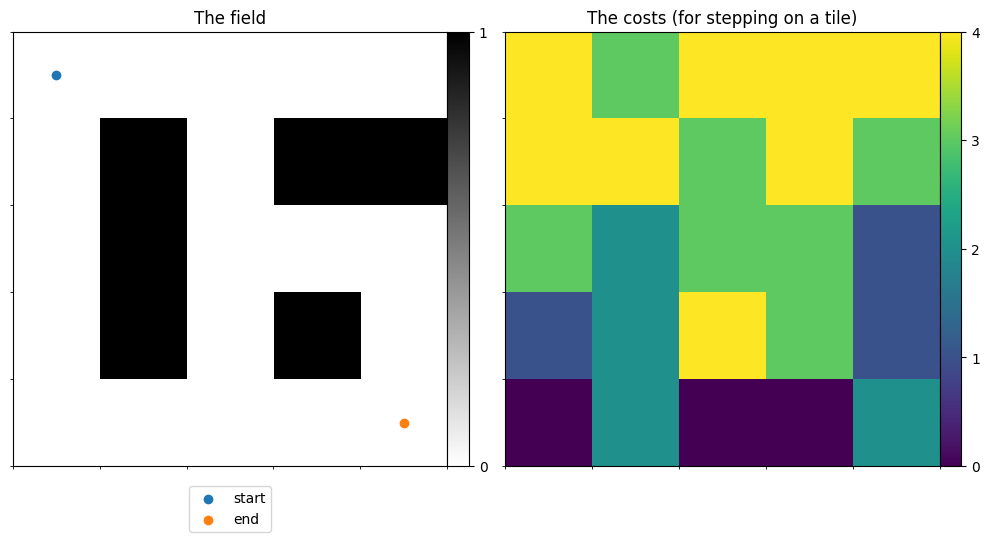

In [73]:
factory = ProblemFactory()
maze = factory.create_problem_from_json(json_path='boards/tiny0.json')
maze.visualize()

<div class="alert alert-warning">
Now it's your turn to implement 5 different uninformed search algorithms - all spots that need your attention are marked with <code># YOUR CODE HERE</code>!
</div>

## Implementing BFS (3 points)

state (4, 4) was reached following the sequence ['R', 'R', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 20, depth: 8)


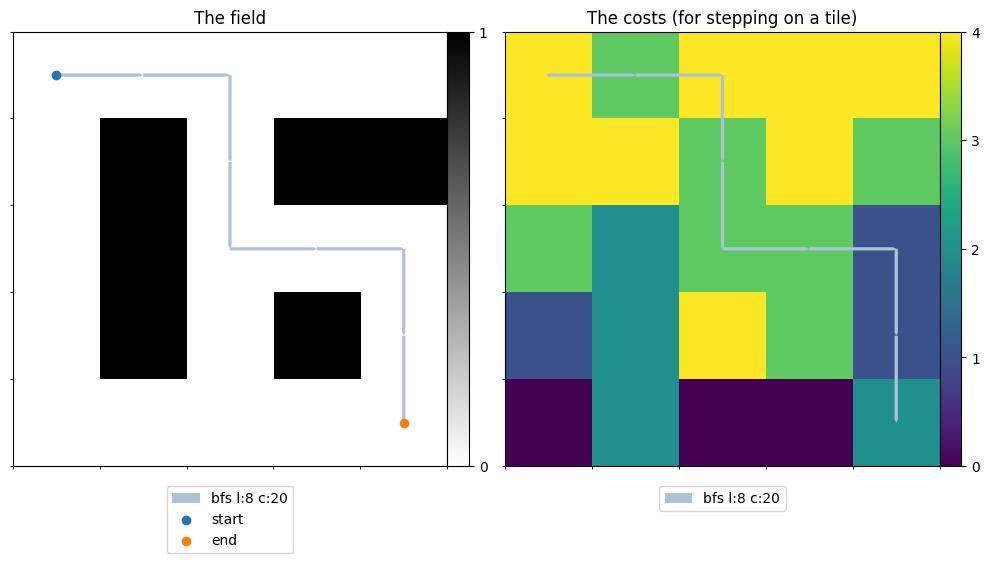

In [74]:
class BFS(object):

    def __init__(self) -> None:
        # YOUR CODE HERE: initialize self.visited and self.fringe here or in the solve function with the correct datatypes
        self.visited = set()
        self.fringe = Queue()

    def solve(self, problem: Problem):        
        # YOUR CODE HERz

        start_node = problem.get_start_node()
        
        self.fringe.put((start_node, [])) 
        self.visited.add(start_node)
      
        while self.fringe.has_elements():
           
            current_node, path = self.fringe.get()
          
            if problem.is_end(current_node):
                return current_node  
            for next_node in problem.successors(current_node):
                if next_node not in self.visited:
                    self.visited.add(next_node)  
                    self.fringe.put((next_node, path + [next_node]))  
        
       
        return None
bfs_search = BFS()
maze.reset() 
bfs_solution = bfs_search.solve(maze)

if bfs_solution is not None:
    bfs_solution.pretty_print()
    maze.visualize(sequences=[('bfs', bfs_solution.get_action_sequence())])

### Basic Checks

In [75]:
# this is a testing cell, do not edit or delete

assert(bfs_solution is not None), "your algorithm did not return a solution"
assert(bfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"


### Check visited set

In [76]:
# this is a testing cell, do not edit or delete

assert(bfs_search.visited is not None), "it seems you did not correctly initialize the visited set"


### Check fringe

In [77]:
# this is a testing cell, do not edit or delete

assert(bfs_search.fringe is not None), "it seems you did not correctly initialize the fringe"


### Check expaned nodes

In [78]:
# this is a testing cell, do not edit or delete

assert(maze.get_number_of_expanded_nodes() > 0), "it seems your algorithm did not expand any nodes"


## Implementing UCS (4 points)

- implement Uniform Cost Search (UCS), a variant of Dijkstra's Graph Search

state (4, 4) was reached following the sequence ['D', 'D', 'D', 'D', 'R', 'R', 'R', 'R'] (cost: 12, depth: 8)


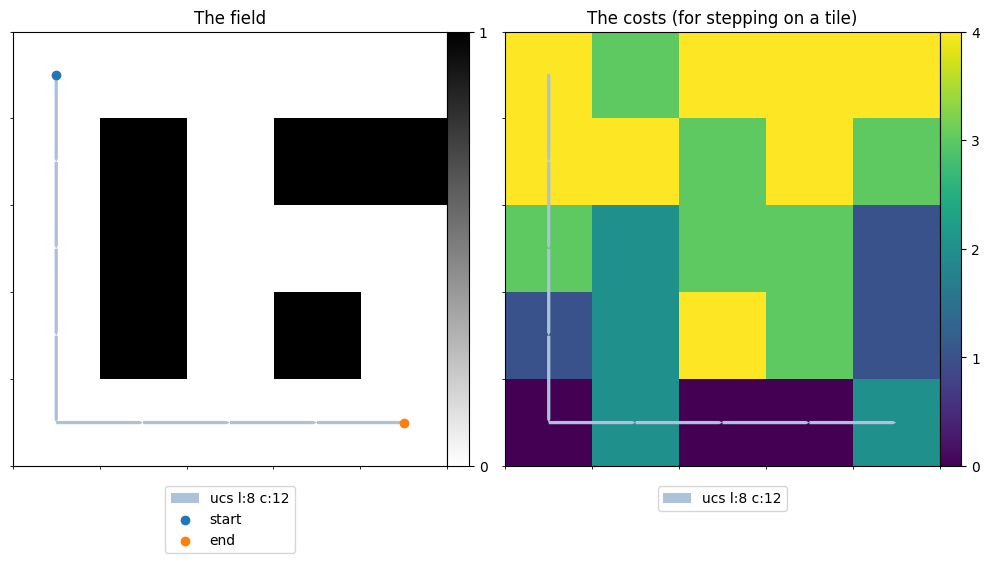

In [79]:
class UCS(object):

    def __init__(self) -> None:
        self.visited = set()  # dictionary to store visited nodes and their costs
        self.fringe = PriorityQueue()  # priority queue for exploring nodes

    def solve(self, problem: Problem):
        start_node = problem.get_start_node()
        self.fringe.put(0, start_node)  # Priority is cost, item is the node
        
        while self.fringe.has_elements():
            current = self.fringe.get()  # Get node with lowest cost
            
            if current in self.visited:
                continue
                
            self.visited.add(current)
            
            if problem.is_end(current):
                return current
                
            for successor in problem.successors(current):
                if successor not in self.visited:
                    # Priority is the total cost to reach this node
                    self.fringe.put(successor.cost, successor)
        
        return None

ucs_search = UCS()
maze.reset() # resets maze for hidden tests
ucs_solution = ucs_search.solve(maze)

if ucs_solution is not None:
    ucs_solution.pretty_print()
    maze.visualize(sequences=[('ucs', ucs_solution.get_action_sequence())])

### Basic checks

In [80]:
# this is a testing cell, do not edit or delete

assert(ucs_solution is not None), "your algorithm did not return a solution"
assert(ucs_solution.state == (4, 4)), "your algorithm did not return the expected solution"


### Check visited set

In [81]:
# this is a testing cell, do not edit or delete

assert(ucs_search.visited is not None), "it seems you did not correctly initialize the visited set"


### Check fringe

In [82]:
# this is a testing cell, do not edit or delete

assert(ucs_search.fringe is not None), "it seems you did not correctly initialize the fringe"


### Checking cost

In [83]:
# this is a testing cell, do not edit or delete

assert(ucs_solution.cost < bfs_solution.cost), "the solution found by your algorithm did not return the expected cost"


## Implementing DFS (3 points)

state (4, 4) was reached following the sequence ['R', 'R', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 20, depth: 8)


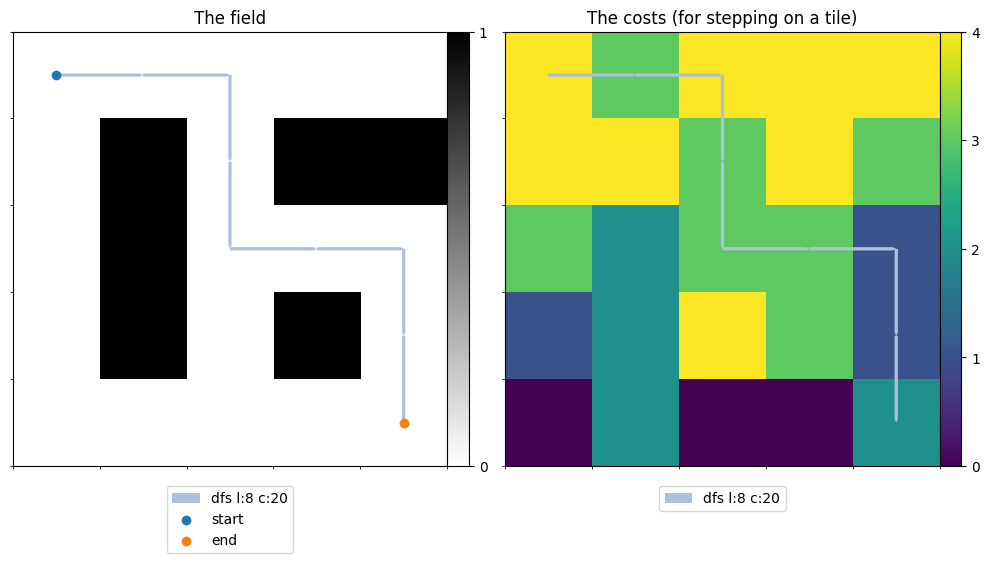

In [84]:
class DFS(object):
    def __init__(self) -> None:
        self.visited = set()  # Keep track of visited nodes
        self.fringe = Stack()  # Stack for frontier nodes

    def solve(self, problem: Problem):
        start_node = problem.get_start_node()
        self.fringe.put(start_node)
        
        while self.fringe.has_elements():
            current = self.fringe.get()
            
            if current in self.visited:
                continue
                
            self.visited.add(current)
            
            if problem.is_end(current):
                return current
                
            # Add successors to stack in reverse order to maintain R,U,D,L ordering
            for successor in reversed(problem.successors(current)):
                if successor not in self.visited:
                    self.fringe.put(successor)
        
        return None

dfs_search = DFS()
maze.reset() # resets maze for hidden tests
dfs_solution = dfs_search.solve(maze)

if dfs_solution is not None:
    dfs_solution.pretty_print()
    maze.visualize(sequences=[('dfs', dfs_solution.get_action_sequence())])

### Basic checks

In [85]:
# this is a testing cell, do not edit or delete

assert(dfs_solution is not None), "your algorithm did not return a solution"
assert(dfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"


### Check visited set

In [86]:
# this is a testing cell, do not edit or delete

assert(dfs_search.visited is not None), "it seems you did not correctly initialize the visited set"


### Check fringe

In [87]:
# this is a testing cell, do not edit or delete

assert(dfs_search.fringe is not None), "it seems you did not correctly initialize the fringe"


## Implementing DLDFS (4 points)

<strong>Hints:</strong>
<ul>
<li>This algorithm should be implemented recursively, which means you will not require an explicit fringe. Think about why this is the case!</li>
<li>To be comparable to our solution you also do not need to use a visited set for this algorithm.</li>
</ul>

state (4, 4) was reached following the sequence ['R', 'R', 'R', 'R', 'L', 'L', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 36, depth: 12)


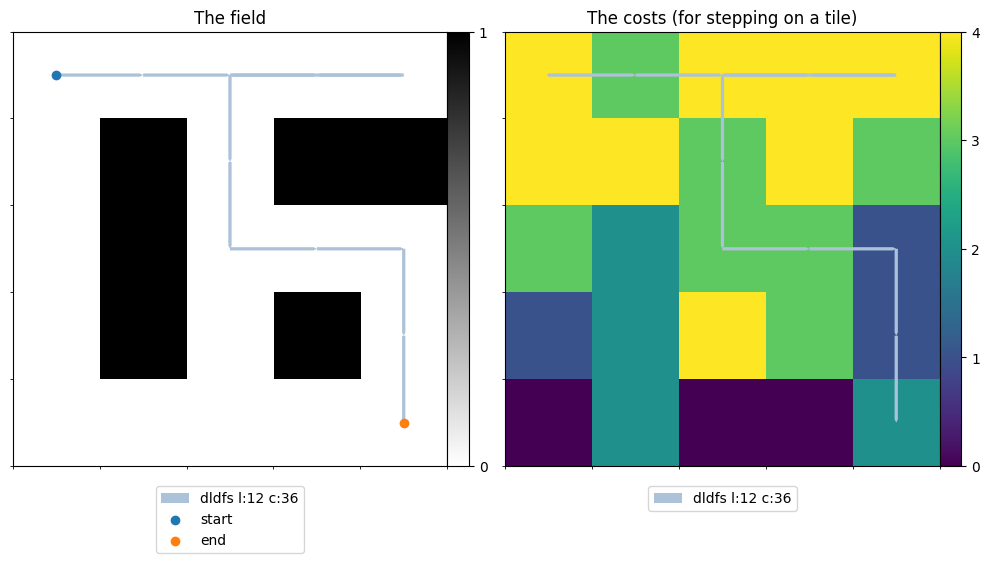

In [88]:
class DLDFS_Recursive(object):
    def __init__(self, max_depth):
        self.max_depth = max_depth

    def solve_aux(self, problem, current):
        
        if problem.is_end(current):
            return current
            
       
        if current.depth >= self.max_depth:
            return None
       
        for successor in problem.successors(current):
            result = self.solve_aux(problem, successor)
            if result is not None:
                return result
                
        return None

    def solve(self, problem: Problem):
        return self.solve_aux(problem, problem.get_start_node())


dldfs_search = DLDFS_Recursive(12)
maze.reset() # resets maze for hidden tests
dldfs_solution = dldfs_search.solve(maze)

if dldfs_solution is not None:
    dldfs_solution.pretty_print()
    maze.visualize(sequences=[('dldfs', dldfs_solution.get_action_sequence())])

### Basic Checks

In [89]:
# this is a testing cell, do not edit or delete

assert(dldfs_solution is not None), "your algorithm did not return a solution"
assert(dldfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"


## Implementing IDS (1 point)

<strong>Hint:</strong>
<ul>
<li>Make use of the DLDFS algorithm that you implemented above</li>
</ul>

state (4, 4) was reached following the sequence ['R', 'R', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 20, depth: 8)


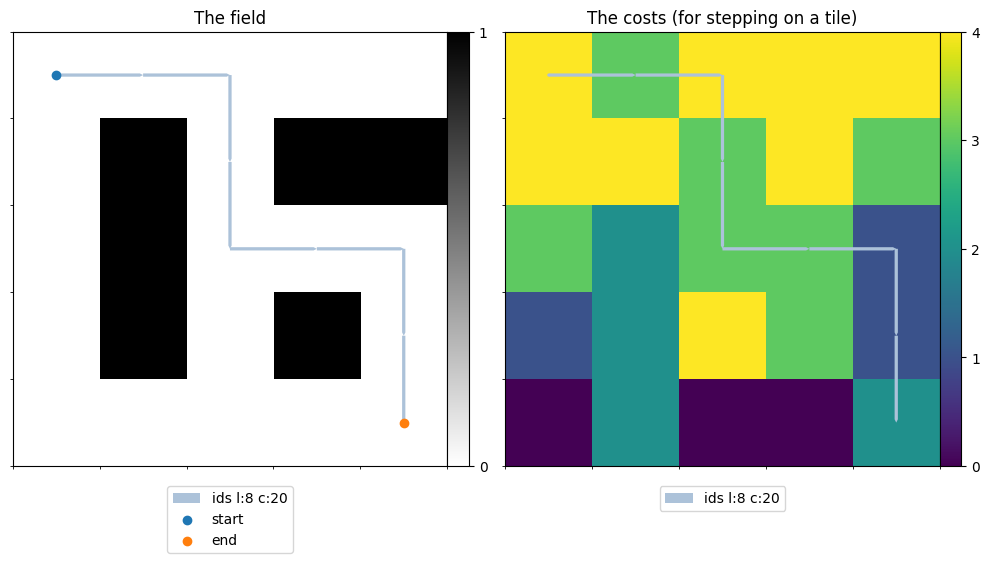

In [92]:
class IDS(object):
    def solve(self, problem: Problem):
        depth = 0
        
        while True:  
            dldfs = DLDFS_Recursive(depth)
            result = dldfs.solve(problem)
            
            if result is not None:
                return result
            depth += 1
            if depth > 100:  
                return None
    
ids_search = IDS()
maze.reset() # resets maze for hidden tests
ids_solution = ids_search.solve(maze)

if ids_solution is not None:
    ids_solution.pretty_print()
    maze.visualize(sequences=[('ids', ids_solution.get_action_sequence())])

In [93]:
# this is a testing cell, do not edit or delete

assert(ids_solution is not None), "your algorithm did not return a solution"
assert(ids_solution.state == (4, 4)), "your algorithm did not return the expected solution"


# Additional tests

<div class="alert alert-danger">
    <strong>Attention!</strong> Do not change anything below this point!
</div>

## BFS

## UCS

## DFS

## DLDFS

In [ ]:
# we need more depth for some of the problem instances
dldfs_search = DLDFS_Recursive(25)

## IDS